<a href="https://colab.research.google.com/github/Tosinoladejo1/Binary_Classification_Project/blob/main/Gaussian_Mixture_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Gaussian Mixture Models for generating new faces

Training a Gaussian mixture model on the Olivetti faces dataset.

First get the olivetti data sets.

Q4.1: Train a Gaussian mixture model on the Olivetti faces dataset using the starter code. If
you are using Google Colab, you will have to reduce your data. Otherwise, your RAM will crash. You may
use the provided code for PCA dimensionality reduction in the starter code. In case you do not have capacity
restrictions and want to try working with the whole dataset for the assignment, feel free to do so. However,
using the reduced dataset would suffice for our purpose

In [1]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [2]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [3]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

## 1. Train a Gaussian mixture model on the Olivetti faces dataset. If you are training on your local system, you can use the dataset as is. But if you are using Google Colab, you will have to reduce your data, otherwise, your RAM will crash. For now, we will provide you with the code for PCA dimensionality reduction. You can use the provided code for that part.

Step 1: Shuffle and split the data to have a better distribution using StratifiedShuffleSplit. Split the data to train set, test set and validation set.

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [5]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


this part is to avoid overflow of your RAM, ignore it for now. you will learn more about them on next lecture.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(0.97)
X_train_reduced = pca.fit_transform(X_train)
X_valid_reduced = pca.transform(X_valid)
X_test_reduced = pca.transform(X_test)

Using the GaussianMixture of sklearn, and with 20 number of components, train a gaussian mixture model on your data.

(set your random state to 42 for reproducibility and you can use the X_train_reduced from the previous part)


In [7]:
from sklearn.mixture import GaussianMixture

random_state = 42

gm = GaussianMixture(n_components=20, random_state=random_state)
gm.fit(X_train_reduced)
y_pred = gm.predict(X_test_reduced)

## 2. Generate 30 new faces by sampling from your model and visualize them.

In [8]:
n_generated_faces = 30
generated_faces_reduced_format, y_gen_faces = gm.sample(n_samples=n_generated_faces)


Now just run this line:D
since your results are in reduced format, you have to use the inverse transform.

In [9]:
generated_faces = pca.inverse_transform(generated_faces_reduced_format)

plot your generated faces. you can use the provided function for it.

In [10]:
import matplotlib.pyplot as plt

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape((faces.shape[0], 64, 64))
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray", vmin=0, vmax=1)
        plt.axis("off")
        plt.title(label)
    plt.show()

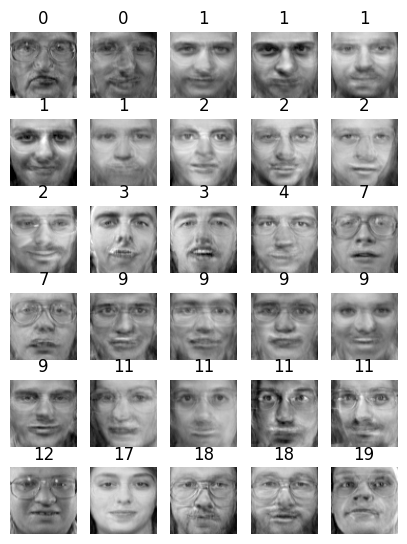

In [11]:
plot_faces(generated_faces, y_gen_faces)

## 3. Take the first 5 images of your dataset and create 15 changed images. The first five(changed) images must be rotated 90 degrees counterclockwise. The second five (changed) images must beflipped. The third five images must be darker than the original images (multiply their channels by 0.3.)

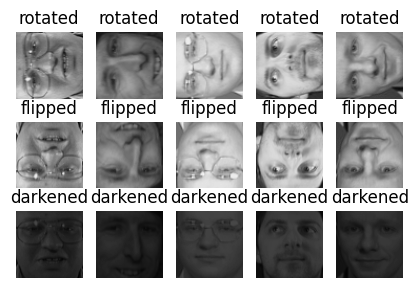

In [12]:
import numpy as np
n_rotated = 5

original_images = X_train[:n_rotated]
original_labels = y_train[:n_rotated]

rotated = np.array([np.rot90(image.reshape(64, 64)) for image in original_images])
rotated = rotated.reshape(-1, 64*64)

n_flipped = 5
flipped =[np.flipud(img.reshape(64, 64)).reshape(-1) for img in original_images]
flipped = np.array(flipped)

n_darkened = 5
darkened = np.array([image.reshape(64, 64) for image in original_images])
darkened = darkened.reshape(-1, 64*64)
darkened = darkened * 0.3


X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = ["rotated"] * n_rotated + ["flipped"] * n_rotated + ["darkened"] * n_rotated

plot_faces(X_bad_faces, y_bad)

## 4. Compute the log-likelihood of each sample. (you can use the gm methods.) Compare these log-likelihoods with the main data scores (maybe for the first 15 samples). Explain the results and describe how we use GMMs for anomaly detection.

Run the following code before next parts:D

In [13]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [14]:
log_likelihoods_bad_faces = gm.score_samples(X_bad_faces_pca)
log_likelihoods_test = gm.score_samples(X_test_reduced)
log_likelihoods_valid = gm.score_samples(X_valid_reduced)


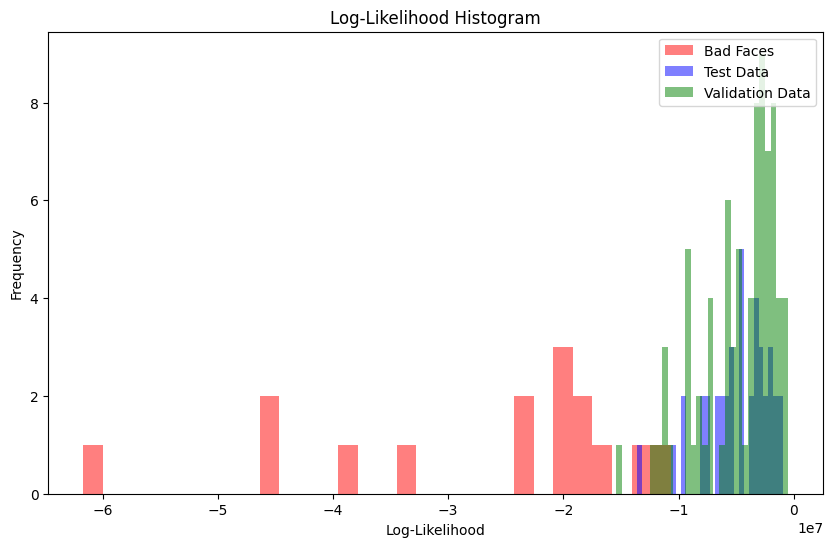

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(log_likelihoods_bad_faces, bins=30, alpha=0.5, label='Bad Faces', color='red')
plt.hist(log_likelihoods_test, bins=30, alpha=0.5, label='Test Data', color='blue')
plt.hist(log_likelihoods_valid, bins=30, alpha=0.5, label='Validation Data', color='green')
plt.xlabel('Log-Likelihood')
plt.ylabel('Frequency')
plt.title('Log-Likelihood Histogram')
plt.legend(loc='upper right')
plt.show()


Bad Faces (Red) have significantly lower log-likelihoods which indicates that they are outliers or anomalies not well represented by the trained GMM.
Test Data (Blue) and Validation Data (Green) shows higher log-likelihoods therby suggesting they fit well within the distribution learned by the GMM. This implies the model correctly learned the characteristics of the face dataset.



**Using GMMs for Anomaly Detection**

GMM is a probabilistic model that assumes all the data points are generated from a mixture of several Gaussian distributions with unknown parameters.
It is used for clustering by finding the parameters of the Gaussian distributions that maximize the likelihood of the data.

**Anomaly Detection with GMM:**

**Training Phase:**
Train the GMM on the dataset to learn the distribution of the normal data.

**Scoring Phase:**
Compute the log-likelihood of new data points.

Data points with significantly lower log-likelihoods compared to the majority of the data are considered anomalies.

*  log_likelihoods_bad_faces represent how likely the augmented images (rotated, flipped, darkened) are under the GMM trained on the main data.

*  log_likelihoods_main_data for the first 15 samples show how likely the main dataset samples are under the same GMM.

Threshold Setting:

Set a threshold for log-likelihood values to classify anomalies. This threshold can be determined based on the distribution of log-likelihoods from the training data.
Data points below this threshold are flagged as anomalies. This approach is useful in various applications, such as fraud detection, network security, and quality control.